In [1]:
# Settup
import pandas as pd
df1 = pd.read_csv("medieval_soldier_load.csv", low_memory=False)

In [2]:
# Droping Extra Columns
df1.drop(columns=["Unnamed: 0", "Reference"], axis=1, inplace=True)
df1.head()

,Name,Origin,Rank,Status,Service,Captain,Lieutenant,Commander,Service Date,Source Type
0,"Wylughby, Robert",NaN,Man-at-Arms,Baron,"Standing Force, France","Willoughby, Robert, Lord",NaN,NaN,NaN,Retinue rolls
1,"Tibetot, [Robert]",NaN,Man-at-Arms,Baron,"Standing Force, Gascony","Plantagenet, Edward `Black Prince` (1330 - 137...",NaN,"Plantagenet, Edward `Black Prince` (1330 - 137...",1368,Retinue roll
2,"Landiras, Seigneur de",NaN,Man-at-Arms,Baron,"Standing Force, Gascony","Plantagenet, Edward `Black Prince` (1330 - 137...",NaN,"Plantagenet, Edward `Black Prince` (1330 - 137...",1368,Retinue roll
3,"Cherlton, Powys Lord, John de",NaN,Man-at-Arms,Baron,Gascony / Aquitaine,"Plantagenet, Edward `Black Prince` (1330 - 137...",NaN,"Plantagenet, Edward `Black Prince` (1330 - 137...",1369,Letters of Protection
4,"Briene, Guy de",NaN,Man-at-Arms,Baron,Naval Service (Keeping of the Sea),"Brian, Guy de (1314 - 1390) Lord Brian",NaN,"Brian, Guy de (1314 - 1390) Lord Brian",1370,Retinue list


In [3]:
# Droping Duplicates - ends up being 1/2 of the data, which was expected.
df1 = df1.drop_duplicates(inplace=False)
print(df1.shape)

(119962, 10)


In [4]:
# Droping all rows with service areas under 100, as forces under 100 recorded troops are not of sufficent importnatance in history to risk biasing data
counts = df1['Service'].value_counts()

df1 = df1[~df1['Service'].isin(counts[counts < 100].index)]

print(df1.shape)

(101796, 10)


In [5]:
# Droping all rows with service types under 50, as under 50 prevents us from having sufficnet quantity to drawn colcusions based on the type of documentation
counts = df1['Source Type'].value_counts()

df1 = df1[~df1['Source Type'].isin(counts[counts < 50].index)]

print(df1.shape)

(101592, 10)


In [6]:
# Droping all rows with rank types under 10, as under 10 is insufficent to draw concusions, but 10 men of the same type in a cluster might indicate something about force compistion
counts = df1['Rank'].value_counts()

df1 = df1[~df1['Rank'].isin(counts[counts < 10].index)]

print(df1.shape)

(101571, 10)


In [7]:
# Droping rows with between 10-3 missing values, to ensure that there is enough data avaiable with each data point to be usable
df1.dropna(axis=0, thresh=0, inplace=True)
df1.dropna(axis=0, thresh=1, inplace=True)
df1.dropna(axis=0, thresh=2, inplace=True)
df1.dropna(axis=0, thresh=3, inplace=True)
df1.dropna(axis=0, thresh=4, inplace=True)
df1.dropna(axis=0, thresh=5, inplace=True)
df1.dropna(axis=0, thresh=6, inplace=True)
df1.dropna(axis=0, thresh=7, inplace=True)
print(df1.shape)

(62350, 10)


In [8]:
# Issue occurs with index numbering: fix by downloading, and reuploading, then removing old index
# Save cleaned data to excel document
df1.to_csv('medieval_soldier_cleaned.csv')

# Reading in data file (duplicate for futher debugging and backup purposes)
df1 = pd.read_csv('medieval_soldier_cleaned_load.csv')

# Drop old incorrect index that has been converted into a column
df1.drop(columns=["Unnamed: 0"], axis=1, inplace=True)

# Call the very end of the head here to make sure that the last value in the index is correct
df1.head(df1.shape[0])

,Name,Origin,Rank,Status,Service,Captain,Lieutenant,Commander,Service Date,Source Type
0,"Tibetot, [Robert]",NaN,Man-at-Arms,Baron,"Standing Force, Gascony","Plantagenet, Edward `Black Prince` (1330 - 137...",NaN,"Plantagenet, Edward `Black Prince` (1330 - 137...",1368.0,Retinue roll
1,"Landiras, Seigneur de",NaN,Man-at-Arms,Baron,"Standing Force, Gascony","Plantagenet, Edward `Black Prince` (1330 - 137...",NaN,"Plantagenet, Edward `Black Prince` (1330 - 137...",1368.0,Retinue roll
2,"Cherlton, Powys Lord, John de",NaN,Man-at-Arms,Baron,Gascony / Aquitaine,"Plantagenet, Edward `Black Prince` (1330 - 137...",NaN,"Plantagenet, Edward `Black Prince` (1330 - 137...",1369.0,Letters of Protection
3,"Briene, Guy de",NaN,Man-at-Arms,Baron,Naval Service (Keeping of the Sea),"Brian, Guy de (1314 - 1390) Lord Brian",NaN,"Brian, Guy de (1314 - 1390) Lord Brian",1370.0,Retinue list
4,"Roos, Lord, Thomas de","Helmsley, [Yorks, NR]",Man-at-Arms,Baron,Gascony / Aquitaine,"John of Gaunt (d. 1399) duke of Lancaster, Aqu...",NaN,"Plantagenet, Edward `Black Prince` (1330 - 137...",1370.0,Letters of Attorney
...,...,...,...,...,...,...,...,...,...,...
62345,"ap Dicus ap Tither, Yollin",NaN,Archer,NaN,"Expedition, France","Oldhall, William, Sir (c. 1390 - 1460)",NaN,"York, Richard of (1411 - 1460) duke of York",1441.0,Retinue roll
62346,"Asshewell, Yon",NaN,Archer,NaN,"Expedition, France","Beaufort, John (1403 - 1444) duke of Somerset","Barton [Barton, Christopher]","Beaufort, John (1403 - 1444) duke of Somerset",1443.0,Muster Roll
62347,"Hamond, Yon",NaN,Archer,NaN,Garrison of Rouen (palace),"York, Richard of (1411 - 1460) duke of York","Gorges, Thibault, Sir (1401 - 1470)",NaN,1445.0,Muster Roll
62348,"Hamont, Yon",NaN,Archer,NaN,Garrison of Rouen (palace),"York, Richard of (1411 - 1460) duke of York","Redford, Henry, Sir",NaN,1446.0,Counter roll


In [9]:
# Final double check to make sure that all data imported correctly
print(df1.shape)

(62350, 10)


In [10]:
# Replace NaN values
df1.fillna("NaN", inplace=True)
df1.head(df1.shape[0])

,Name,Origin,Rank,Status,Service,Captain,Lieutenant,Commander,Service Date,Source Type
0,"Tibetot, [Robert]",NaN,Man-at-Arms,Baron,"Standing Force, Gascony","Plantagenet, Edward `Black Prince` (1330 - 137...",NaN,"Plantagenet, Edward `Black Prince` (1330 - 137...",1368,Retinue roll
1,"Landiras, Seigneur de",NaN,Man-at-Arms,Baron,"Standing Force, Gascony","Plantagenet, Edward `Black Prince` (1330 - 137...",NaN,"Plantagenet, Edward `Black Prince` (1330 - 137...",1368,Retinue roll
2,"Cherlton, Powys Lord, John de",NaN,Man-at-Arms,Baron,Gascony / Aquitaine,"Plantagenet, Edward `Black Prince` (1330 - 137...",NaN,"Plantagenet, Edward `Black Prince` (1330 - 137...",1369,Letters of Protection
3,"Briene, Guy de",NaN,Man-at-Arms,Baron,Naval Service (Keeping of the Sea),"Brian, Guy de (1314 - 1390) Lord Brian",NaN,"Brian, Guy de (1314 - 1390) Lord Brian",1370,Retinue list
4,"Roos, Lord, Thomas de","Helmsley, [Yorks, NR]",Man-at-Arms,Baron,Gascony / Aquitaine,"John of Gaunt (d. 1399) duke of Lancaster, Aqu...",NaN,"Plantagenet, Edward `Black Prince` (1330 - 137...",1370,Letters of Attorney
...,...,...,...,...,...,...,...,...,...,...
62345,"ap Dicus ap Tither, Yollin",NaN,Archer,NaN,"Expedition, France","Oldhall, William, Sir (c. 1390 - 1460)",NaN,"York, Richard of (1411 - 1460) duke of York",1441,Retinue roll
62346,"Asshewell, Yon",NaN,Archer,NaN,"Expedition, France","Beaufort, John (1403 - 1444) duke of Somerset","Barton [Barton, Christopher]","Beaufort, John (1403 - 1444) duke of Somerset",1443,Muster Roll
62347,"Hamond, Yon",NaN,Archer,NaN,Garrison of Rouen (palace),"York, Richard of (1411 - 1460) duke of York","Gorges, Thibault, Sir (1401 - 1470)",NaN,1445,Muster Roll
62348,"Hamont, Yon",NaN,Archer,NaN,Garrison of Rouen (palace),"York, Richard of (1411 - 1460) duke of York","Redford, Henry, Sir",NaN,1446,Counter roll


In [11]:
# One hot data for Rank, Status, Service, and Source type to make the data easily usable
from sklearn.preprocessing import OneHotEncoder

def oneHot(data, column):
    ohe = OneHotEncoder()
    col = ohe.fit_transform(data[[column]]).toarray()
    colDF = pd.DataFrame(col).astype(int)
    colDF.columns = [column + "_" + name[3:] for name in ohe.get_feature_names()]
    data.drop(columns=[column], inplace=True)
    data = pd.concat([data, colDF], axis=1)
    return data

In [12]:
# Label encode data
from sklearn.preprocessing import LabelEncoder

def labelEncode(data, column):
    le = LabelEncoder()
    col = le.fit_transform(data[[column]])
    colDF = pd.DataFrame(col).astype(int)
    colDF.columns = [column]
    data.drop(columns=[column], inplace=True)
    data = pd.concat([data, colDF], axis=1)
    return data

In [13]:
# One hot or label encode the necessary columns
encode_columns = ["Rank", "Status", "Service", "Source Type"]
for column in encode_columns:
#     df1 = oneHot(df1, column)
    df1 = labelEncode(df1, column)

df1.head(62530)

/usr/local/share/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,Name,Origin,Captain,Lieutenant,Commander,Service Date,Rank,Status,Service,Source Type
0,"Tibetot, [Robert]",NaN,"Plantagenet, Edward `Black Prince` (1330 - 137...",NaN,"Plantagenet, Edward `Black Prince` (1330 - 137...",1368,14,1,121,18
1,"Landiras, Seigneur de",NaN,"Plantagenet, Edward `Black Prince` (1330 - 137...",NaN,"Plantagenet, Edward `Black Prince` (1330 - 137...",1368,14,1,121,18
2,"Cherlton, Powys Lord, John de",NaN,"Plantagenet, Edward `Black Prince` (1330 - 137...",NaN,"Plantagenet, Edward `Black Prince` (1330 - 137...",1369,14,1,90,7
3,"Briene, Guy de",NaN,"Brian, Guy de (1314 - 1390) Lord Brian",NaN,"Brian, Guy de (1314 - 1390) Lord Brian",1370,14,1,93,16
4,"Roos, Lord, Thomas de","Helmsley, [Yorks, NR]","John of Gaunt (d. 1399) duke of Lancaster, Aqu...",NaN,"Plantagenet, Edward `Black Prince` (1330 - 137...",1370,14,1,90,6
...,...,...,...,...,...,...,...,...,...,...
62345,"ap Dicus ap Tither, Yollin",NaN,"Oldhall, William, Sir (c. 1390 - 1460)",NaN,"York, Richard of (1411 - 1460) duke of York",1441,1,12,7,18
62346,"Asshewell, Yon",NaN,"Beaufort, John (1403 - 1444) duke of Somerset","Barton [Barton, Christopher]","Beaufort, John (1403 - 1444) duke of Somerset",1443,1,12,7,12
62347,"Hamond, Yon",NaN,"York, Richard of (1411 - 1460) duke of York","Gorges, Thibault, Sir (1401 - 1470)",NaN,1445,1,12,71,12
62348,"Hamont, Yon",NaN,"York, Richard of (1411 - 1460) duke of York","Redford, Henry, Sir",NaN,1446,1,12,71,2


In [14]:
# Import necessary tools for K-Means clustering and visualization
import random 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from sklearn.datasets.samples_generator import make_blobs 
%matplotlib inline

/usr/local/share/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [15]:
# Convert Service Date column from string type to float
df1["Service Date"] = df1["Service Date"].astype(float)
df1.replace([np.inf, -np.inf], np.nan, inplace=True)
df1 = df1[df1["Service Date"].notna()]
df1.head(df1.shape[0])

,Name,Origin,Captain,Lieutenant,Commander,Service Date,Rank,Status,Service,Source Type
0,"Tibetot, [Robert]",NaN,"Plantagenet, Edward `Black Prince` (1330 - 137...",NaN,"Plantagenet, Edward `Black Prince` (1330 - 137...",1368.0,14,1,121,18
1,"Landiras, Seigneur de",NaN,"Plantagenet, Edward `Black Prince` (1330 - 137...",NaN,"Plantagenet, Edward `Black Prince` (1330 - 137...",1368.0,14,1,121,18
2,"Cherlton, Powys Lord, John de",NaN,"Plantagenet, Edward `Black Prince` (1330 - 137...",NaN,"Plantagenet, Edward `Black Prince` (1330 - 137...",1369.0,14,1,90,7
3,"Briene, Guy de",NaN,"Brian, Guy de (1314 - 1390) Lord Brian",NaN,"Brian, Guy de (1314 - 1390) Lord Brian",1370.0,14,1,93,16
4,"Roos, Lord, Thomas de","Helmsley, [Yorks, NR]","John of Gaunt (d. 1399) duke of Lancaster, Aqu...",NaN,"Plantagenet, Edward `Black Prince` (1330 - 137...",1370.0,14,1,90,6
...,...,...,...,...,...,...,...,...,...,...
62345,"ap Dicus ap Tither, Yollin",NaN,"Oldhall, William, Sir (c. 1390 - 1460)",NaN,"York, Richard of (1411 - 1460) duke of York",1441.0,1,12,7,18
62346,"Asshewell, Yon",NaN,"Beaufort, John (1403 - 1444) duke of Somerset","Barton [Barton, Christopher]","Beaufort, John (1403 - 1444) duke of Somerset",1443.0,1,12,7,12
62347,"Hamond, Yon",NaN,"York, Richard of (1411 - 1460) duke of York","Gorges, Thibault, Sir (1401 - 1470)",NaN,1445.0,1,12,71,12
62348,"Hamont, Yon",NaN,"York, Richard of (1411 - 1460) duke of York","Redford, Henry, Sir",NaN,1446.0,1,12,71,2


In [16]:
# Normalize over the standard deviation
from sklearn.preprocessing import StandardScaler

columns = ["Rank", "Status", "Service", "Service Date", "Source Type"]
dfCols = df1[columns]
X = dfCols.values[:,:]
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet

array([[ 1.07509487, -4.61885906,  1.29567084, -1.3227758 ,  0.87797327],
       [ 1.07509487, -4.61885906,  1.29567084, -1.3227758 ,  0.87797327],
       [ 1.07509487, -4.61885906,  0.60747361, -1.2781413 , -1.69105962],
       ...,
       [-0.92228296,  0.34573917,  0.1856753 ,  2.11408016, -0.5233174 ],
       [-0.92228296,  0.34573917,  0.1856753 ,  2.15871466, -2.85880184],
       [-0.92228296,  0.34573917,  0.1856753 ,  2.20334915, -2.85880184]])

In [17]:
# Apply K-Means clustering
clusterNum = 4
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(X)
labels = k_means.labels_
print(labels)

[2 2 2 ... 0 0 0]


In [18]:
# Assign cluster labels to original dataframe
df1["Clus_km"] = labels
df1.head(df1.shape[0])

,Name,Origin,Captain,Lieutenant,Commander,Service Date,Rank,Status,Service,Source Type,Clus_km
0,"Tibetot, [Robert]",NaN,"Plantagenet, Edward `Black Prince` (1330 - 137...",NaN,"Plantagenet, Edward `Black Prince` (1330 - 137...",1368.0,14,1,121,18,2
1,"Landiras, Seigneur de",NaN,"Plantagenet, Edward `Black Prince` (1330 - 137...",NaN,"Plantagenet, Edward `Black Prince` (1330 - 137...",1368.0,14,1,121,18,2
2,"Cherlton, Powys Lord, John de",NaN,"Plantagenet, Edward `Black Prince` (1330 - 137...",NaN,"Plantagenet, Edward `Black Prince` (1330 - 137...",1369.0,14,1,90,7,2
3,"Briene, Guy de",NaN,"Brian, Guy de (1314 - 1390) Lord Brian",NaN,"Brian, Guy de (1314 - 1390) Lord Brian",1370.0,14,1,93,16,2
4,"Roos, Lord, Thomas de","Helmsley, [Yorks, NR]","John of Gaunt (d. 1399) duke of Lancaster, Aqu...",NaN,"Plantagenet, Edward `Black Prince` (1330 - 137...",1370.0,14,1,90,6,2
...,...,...,...,...,...,...,...,...,...,...,...
62345,"ap Dicus ap Tither, Yollin",NaN,"Oldhall, William, Sir (c. 1390 - 1460)",NaN,"York, Richard of (1411 - 1460) duke of York",1441.0,1,12,7,18,1
62346,"Asshewell, Yon",NaN,"Beaufort, John (1403 - 1444) duke of Somerset","Barton [Barton, Christopher]","Beaufort, John (1403 - 1444) duke of Somerset",1443.0,1,12,7,12,1
62347,"Hamond, Yon",NaN,"York, Richard of (1411 - 1460) duke of York","Gorges, Thibault, Sir (1401 - 1470)",NaN,1445.0,1,12,71,12,0
62348,"Hamont, Yon",NaN,"York, Richard of (1411 - 1460) duke of York","Redford, Henry, Sir",NaN,1446.0,1,12,71,2,0


In [19]:
# Group instances by their cluster
df1.groupby("Clus_km").mean()

,Service Date,Rank,Status,Service,Source Type
Clus_km,,,,,
0,1427.431538,7.457236,11.848799,79.567034,12.008177
1,1419.479124,5.350900,12.094276,11.291562,13.785361
2,1382.520958,7.384050,10.779841,102.654193,15.093652
3,1377.088978,8.721820,10.448638,10.849913,14.262809


In [20]:
"""
It looks like the Service Data, Rank, Status, and Service variables 
are at least somewhat significant in determining clusters. We
will begin visualizations by plotting these three variables,
after which we will plot the remaining variables, in case
there are interesting results to be found there.
"""

'\nIt looks like the Service Data, Rank, Status, and Service variables \nare at least somewhat significant in determining clusters. We\nwill begin visualizations by plotting these three variables,\nafter which we will plot the remaining variables, in case\nthere are interesting results to be found there.\n'

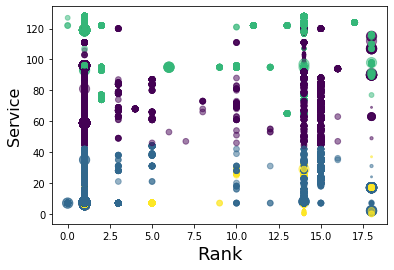

In [21]:
# View the clusters in 2D space with variables Rank and Service
# Circle area is determined by the Status variable
area = np.pi * ( X[:, 1] * 0.15)**4
plt.scatter(X[:, 0], X[:, 2], s=area, c=labels.astype(np.float), alpha=0.5)
plt.xlabel("Rank", fontsize=18)
plt.ylabel("Service", fontsize=16)
plt.show()

In [22]:
"""
We can clearly see that Service plays a very important part in
determining the cluster a person is put into. There does not
appear to be a significant correlation between Rank and cluster.
It also seems, given the size of the circles in the above figure,
that Status does little to determine which cluster a person will
be put into. So we can conclude that the Service variable is
most significant in picking a cluster.
"""

'\nWe can clearly see that Service plays a very important part in\ndetermining the cluster a person is put into. There does not\nappear to be a significant correlation between Rank and cluster.\nIt also seems, given the size of the circles in the above figure,\nthat Status does little to determine which cluster a person will\nbe put into. So we can conclude that the Service variable is\nmost significant in picking a cluster.\n'

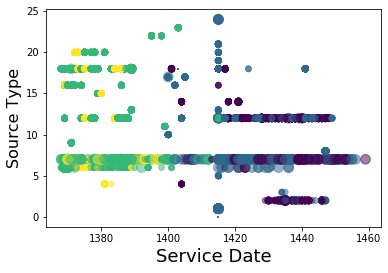

In [23]:
# View the clusters in 2D space with variables Service Date and Source Type
# Circle area is determined by the Rank variable
area = np.pi * ( X[:, 0] * 0.13)**4
plt.scatter(X[:, 3], X[:, 4], s=area, c=labels.astype(np.float), alpha=0.5)
plt.xlabel("Service Date", fontsize=18)
plt.ylabel("Source Type", fontsize=16)
plt.show()

In [24]:
"""
There appears to be some correlation between Service
Date and cluster, although it is clearly not as
significant as that of the Service variable. The Source
Type and, again, Rank variables seem not to be as
important to the model.
"""

'\nThere appears to be some correlation between Service\nDate and cluster, although it is clearly not as\nsignificant as that of the Service variable. The Source\nType and, again, Rank variables seem not to be as\nimportant to the model.\n'

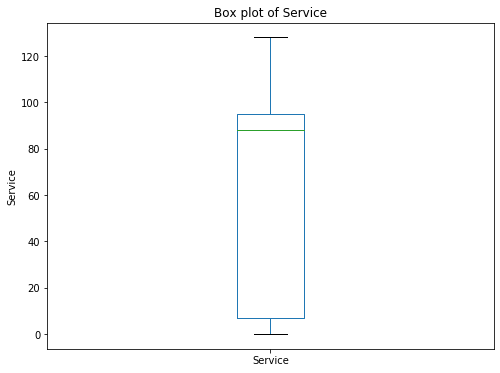

In [25]:
# Create box plot for Service
df_service = df1[["Service", "Clus_km"]]
df_service.set_index("Clus_km", inplace=True)
df_service.plot(kind='box', figsize=(8, 6))

plt.title('Box plot of Service')
plt.ylabel('Service')

plt.show()

In [38]:
"""
We see the most common service is around 90, the 
services France Expedition and Naval Service Expedition, 
the small standard deviation above 90 indicates that 
those services are also have allot of men. This makes 
sense as we have many men in French service and Naval 
Keeping of the Sea Service. The large lower standard 
deviation indicates that there are many small services, 
confirmed by the fact that many services have about 
100-500 men.
"""


'\nWe see the most common service is around 90, the \nservices France Expedition and Naval Service Expedition, \nthe small standard deviation above 90 indicates that \nthose services are also have allot of men. This makes \nsense as we have many men in French service and Naval \nKeeping of the Sea Service. The large lower standard \ndeviation indicates that there are many small services, \nconfirmed by the fact that many services have about \n100-500 men.\n'

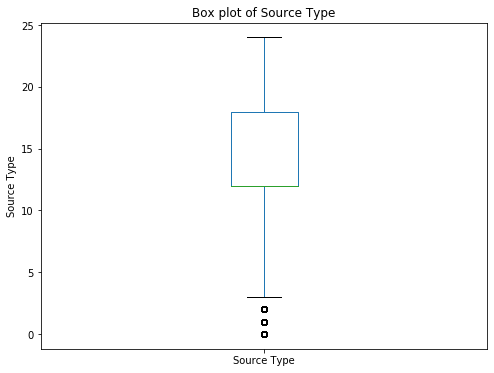

In [26]:
# Create box plot for Source Type
df_service = df1[["Source Type", "Clus_km"]]
df_service.set_index("Clus_km", inplace=True)
df_service.plot(kind='box', figsize=(8, 6))

plt.title('Box plot of Source Type')
plt.ylabel('Source Type')

plt.show()

In [39]:
"""
We see the most common source type is at 12 or 13 
(Retinue Lists and Retinue Rolls), and that the 
number is so high there is functionally no standard 
deviation below it. The small standard deviation 
box indicates that most of our data is tied up in a
few types of source. 
"""

'\nWe see the most common source type is at 12 or 13 \n(Retinue Lists and Retinue Rolls), and that the \nnumber is so high there is functionally no standard \ndeviation below it. The small standard deviation \nbox indicates that most of our data is tied up in a\nfew types of source. \n'

Text(0, 0.5, 'Inertia')

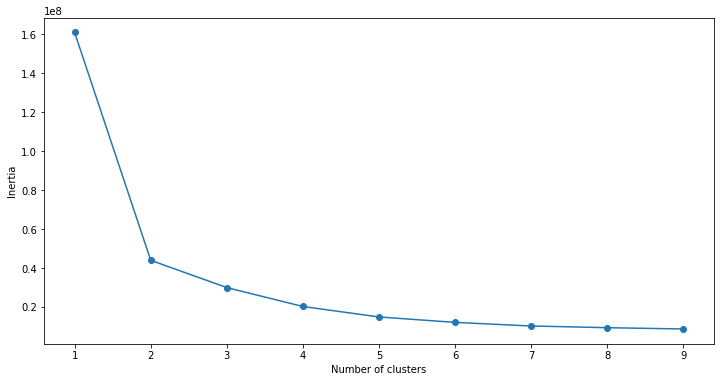

In [27]:
# We will now use the Elbow method to see if 4 was a good value to use for k
SSE = []
for cluster in range(1,10):
    kmeans = KMeans(n_jobs = -1, n_clusters = cluster, init='k-means++')
    kmeans.fit(X)
    SSE.append(kmeans.inertia_)

frame = pd.DataFrame({'Cluster':range(1,10), 'SSE':SSE})
plt.figure(figsize=(12,6))

plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [28]:
"""
The graph drops dramatically between k=1 to k=2. After 2,
it is nearly steady in its descent. At the end, k=9, the
graph is almost completely flat. It would not have made
much of a difference if we had used, for example, k=2
instead of k=4, considering that everything after k=1 was
pretty much the same.
"""

'\nThe graph drops dramatically between k=1 to k=2. After 2,\nit is nearly steady in its descent. At the end, k=9, the\ngraph is almost completely flat. It would not have made\nmuch of a difference if we had used, for example, k=2\ninstead of k=4, considering that everything after k=1 was\npretty much the same.\n'

In [29]:
# Now we will use the Elbow method to figure out which k value is the most suitable
from sklearn import metrics
from scipy.spatial.distance import cdist
distortions = [] 
inertias = [] 
mapping1 = {} 
mapping2 = {} 
K = range(1,10) 
  
for k in K: 
    #Building and fitting the model 
    kmeanModel = KMeans(n_clusters=k).fit(X) 
    kmeanModel.fit(X)     
      
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 
                      'euclidean'),axis=1)) / X.shape[0]) 
    inertias.append(kmeanModel.inertia_) 
  
    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_, 
                 'euclidean'),axis=1)) / X.shape[0] 
    mapping2[k] = kmeanModel.inertia_ 

In [30]:
# Next, we can inspect the distortion across k values
for key,val in mapping1.items(): 
    print(str(key)+' : '+str(val)) 

1 : 49.39032065850988
2 : 23.557867025809056
3 : 20.068289891997335
4 : 16.360419379921783
5 : 13.723167163725728
6 : 12.547228993734011
7 : 11.777489297418303
8 : 11.085552626307429
9 : 10.61946184762534


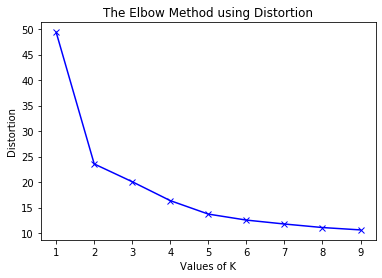

In [31]:
# Additionally, we will visualize it using a graph
plt.plot(K, distortions, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.show()

In [32]:
"""
Again we see that the graph drops dramatically between
k=1 and k=2, and drops less afterwards. Judging by this
graph, we can say that k=4 was a good choice, although
5 or 6 would have been slightly better. That said,
anything at k=2 and onwards would have probably been
fine.
"""

'\nAgain we see that the graph drops dramatically between\nk=1 and k=2, and drops less afterwards. Judging by this\ngraph, we can say that k=4 was a good choice, although\n5 or 6 would have been slightly better. That said,\nanything at k=2 and onwards would have probably been\nfine.\n'